Import arff for the arff library to handle the data.

In [1]:
import arff


Import sys is needed to locate the file successfully on your computer.

In [2]:
import sys


Method for finding the dataset in my directory and returning it

In [3]:
import os
import arff
import pandas as pd

def load_arff_dataset():
    # Define the path to your dataset
    directory = r'E:\School stuff\Fall 2024\Neural Networks\Project3'
    filename = 'dataset_31_credit-g.arff'
    
    # Create the full path to the file
    file_path = os.path.join(directory, filename)
    
    try:
        # Open the ARFF file and load it
        with open(file_path, 'r') as f:
            data = arff.load(f)
        
        # Convert the data to a pandas DataFrame
        df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])
        
        print(f"Dataset loaded successfully from {file_path}")
        return df
    
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

Loading the dataset into a variable named 'dataset'

In [4]:
dataset = load_arff_dataset()

Dataset loaded successfully from E:\School stuff\Fall 2024\Neural Networks\Project3\dataset_31_credit-g.arff


This shows us the info of the dataset. We can see that each category has 1000 non-null values. This is important to note for when it comes to cleaning the dataset.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

Head shows us the first 5 values in each category. This can be useful to give us a broad idea of what the values inside the dataset look like.

In [6]:
dataset.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


As we noted earlier, there are no null values in our dataset.

In [7]:
print(dataset.isna().sum())

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


Checking for duplicate entries. The result was 0, so we don't have to deal with fixing that.

In [8]:
print(dataset.duplicated().sum())

0


Changing the target column 'class' to a numerical value. If row in class was 'good' it will be changed to '1', and if the row in class was 'bad' it will be changed to '0'.

In [9]:
dataset['class'] = dataset['class'].apply(lambda x: 1 if x == 'good' else 0)

Dropping 'class' from the dataset since it is our target column. storing 'class' in y

In [10]:
X = dataset.drop('class', axis=1)
y = dataset['class']

List Categorical Columns

In [11]:
categorical_columns = [
    'checking_status', 'credit_history', 'purpose', 'savings_status',
    'employment', 'personal_status', 'other_parties', 'property_magnitude',
    'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'
]

List Numerical Columns

In [12]:
numerical_columns = ['duration', 'credit_amount', 'installment_commitment', 
                     'residence_since', 'age', 'existing_credits', 'num_dependents']

Defining the column transfer for preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(drop='first'), categorical_columns)
])

Fitting and Transforming the features

In [14]:
X_processed = preprocessor.fit_transform(X)

Shape of the processed data

In [15]:
X_processed.shape

(1000, 48)

Splitting the data into Training, Validation, and Test sets. 70% Training, 15% Validation, and 15% Test.

In [16]:
from sklearn.model_selection import train_test_split

# Split the data: 70% training, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Check the sizes of each split
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (700, 48), (700,)
Validation set: (150, 48), (150,)
Test set: (150, 48), (150,)


Defining the MLP Model. Shape=48 since that the amount of features in the dataset. Compiling the model, and displaying a summary of the model. The Summary displays each layers name, output shape, number of paramaters, and all of its parameters. It also displays the total number of trainable and non-trainable parameters.

In [17]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input


model = Sequential([
    Input(shape=(48,)),  
    Dense(64, activation='relu', name='hidden_layer_1'),
    Dropout(0.3),
    Dense(32, activation='relu', name='hidden_layer_2'),
    Dropout(0.3),
    Dense(1, activation='sigmoid', name='output_layer')  
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

Implementing EarlyStoppping to prevent overfitting, and Training the model.

In [18]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,  
    validation_data=(X_val, y_val),  
    epochs=100,  
    batch_size=32,  
    callbacks=[early_stopping]
)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5047 - loss: 0.7326 - val_accuracy: 0.7000 - val_loss: 0.6063
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7133 - loss: 0.6105 - val_accuracy: 0.7000 - val_loss: 0.5892
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7252 - loss: 0.5836 - val_accuracy: 0.7000 - val_loss: 0.5737
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7288 - loss: 0.5550 - val_accuracy: 0.7267 - val_loss: 0.5641
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7184 - loss: 0.5503 - val_accuracy: 0.7333 - val_loss: 0.5548
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 0.5439 - val_accuracy: 0.7467 - val_loss: 0.5501
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7720 - loss: 0.5065 - val_accuracy: 0.7400 - val_loss: 0.5446
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7602 - loss: 0.5160 - val_accuracy: 0.7533 - 

Using Matplotlib to visualize the Training Loss vs. the Validation Loss and the Training Accuracy vs. the Validation Accuracy.

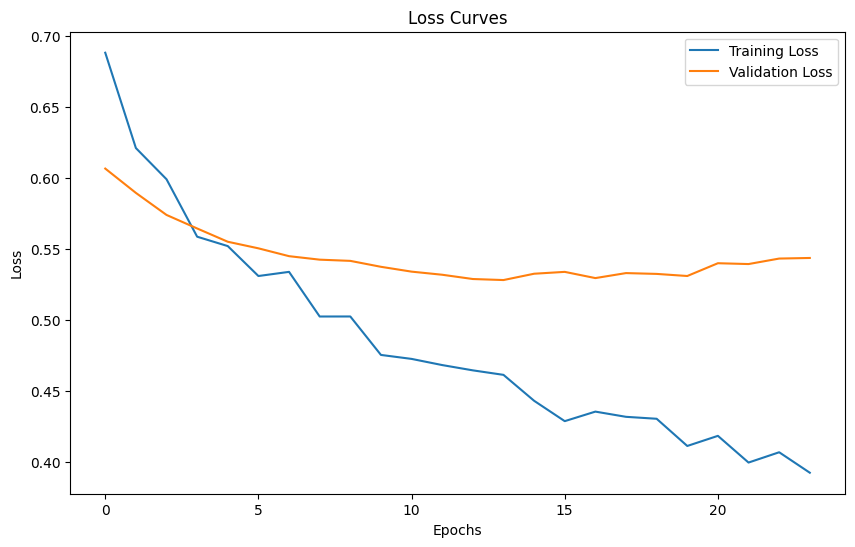

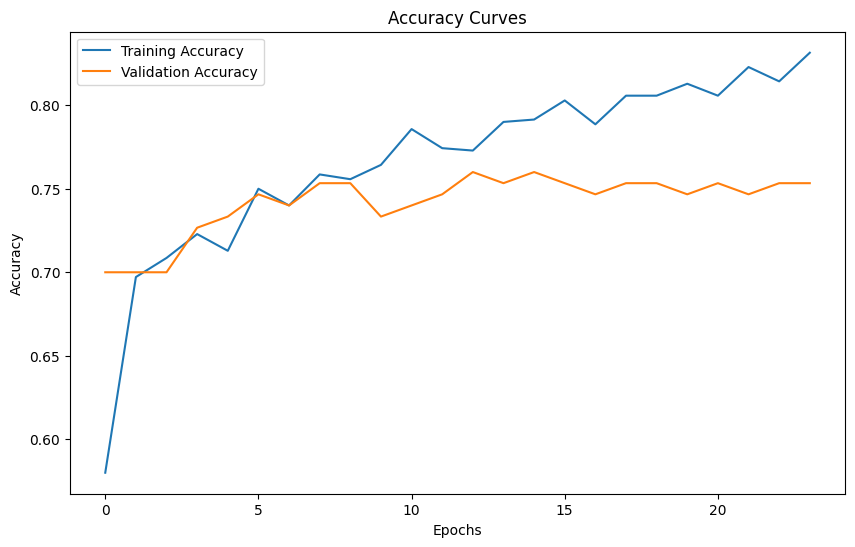

In [19]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Retraining the model using the tensorboard callback

In [20]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Define a log directory with a timestamp
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, tensorboard_callback]
)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7926 - loss: 0.4421 - val_accuracy: 0.7600 - val_loss: 0.5309
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8077 - loss: 0.4463 - val_accuracy: 0.7533 - val_loss: 0.5328
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8170 - loss: 0.4133 - val_accuracy: 0.7533 - val_loss: 0.5344
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8413 - loss: 0.4066 - val_accuracy: 0.7600 - val_loss: 0.5324
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8390 - loss: 0.3921 - val_accuracy: 0.7600 - val_loss: 0.5405
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7873 - loss: 0.4552 - val_accuracy: 0.7600 - val_loss: 0.5347
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8125 - loss: 0.4130 - val_accuracy: 0.7467 - val_loss: 0.5384
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8192 - loss: 0.4038 - val_accuracy: 0.7467 - 

Loading the tensorboard

In [21]:
%load_ext tensorboard
%tensorboard --logdir logs/fit --port 6007


Test loss and Test accuracy values

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7124 - loss: 0.5111
Test Loss: 0.49610665440559387
Test Accuracy: 0.7400000095367432


Predictions on the test set, Classification report, and AUC-ROC score

In [23]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# AUC-ROC score
auc = roc_auc_score(y_test, y_pred_probs)
print(f"AUC-ROC Score: {auc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        45
           1       0.79      0.86      0.82       105

    accuracy                           0.74       150
   macro avg       0.69      0.66      0.67       150
weighted avg       0.73      0.74      0.73       150

AUC-ROC Score: 0.7862433862433863


Fitting the model using class weights

In [24]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


y_train = np.array(y_train, dtype=int)

class_weights_dict = {0: 1.8, 1: 0.85}
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    class_weight=class_weights_dict,  
    callbacks=[early_stopping, tensorboard_callback]
)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7709 - loss: 0.6055 - val_accuracy: 0.7267 - val_loss: 0.5551
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7713 - loss: 0.5265 - val_accuracy: 0.7333 - val_loss: 0.5447
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7638 - loss: 0.5429 - val_accuracy: 0.7067 - val_loss: 0.5522
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7960 - loss: 0.5308 - val_accuracy: 0.7000 - val_loss: 0.5609
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8036 - loss: 0.4855 - val_accuracy: 0.7200 - val_loss: 0.5533
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7931 - loss: 0.5300 - val_accuracy: 0.6800 - val_loss: 0.5580
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8115 - loss: 0.5167 - val_accuracy: 0.7267 - val_loss: 0.5533


Evaluate on the test set, Predictions on the test set, Classification Report, and AUC-ROC score after fitting the model with class weights.

In [25]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))

# AUC-ROC score
auc = roc_auc_score(y_test, y_pred_probs)
print(f"AUC-ROC Score: {auc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7054 - loss: 0.5409 
Test Loss: 0.5155547857284546
Test Accuracy: 0.7400000095367432
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        45
           1       0.84      0.77      0.81       105

    accuracy                           0.74       150
   macro avg       0.70      0.72      0.71       150
weighted avg       0.76      0.74      0.75       150

AUC-ROC Score: 0.787089947089947


Enabling hyperparameter tuning using Keras Tuner. This function will help systematically search for the optimal combination of hyperparameters.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras_tuner import RandomSearch
import tensorflow as tf

def build_model(hp):
    model = Sequential()
    # Input Layer
    model.add(Dense(
        hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    # Dropout for Regularization
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Second Hidden Layer
    model.add(Dense(
        hp.Int('units_2', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

Import RandomSearch, which works by randomly sampling combinations of hyperparameters with the defined search space. Initializing the tuner, which optimizes for validation accuracy.

In [27]:
from keras_tuner.tuners import RandomSearch

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Metric to optimize
    max_trials=10,            # Number of configurations to try
    executions_per_trial=1,   # Number of executions per configuration
    directory='my_dir',       # Directory to save logs
    project_name='credit_risk'  # Project name
)

Reloading Tuner from my_dir\credit_risk\tuner0.json


Performing the search

In [28]:
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Retrieving the best hyperparameters and storing it in best_hps.

In [29]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

Best Hyperparameters: {'units_1': 128, 'dropout_1': 0.2, 'units_2': 96, 'dropout_2': 0.4, 'optimizer': 'adam'}


Building the best model using the newly found best hyperparameters and evaluating it.

In [30]:
# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the model
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Best Model Test Loss: {test_loss}")
print(f"Best Model Test Accuracy: {test_accuracy}")

Epoch 1/100


C:\Users\Brad\Documents\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5975 - loss: 0.6648 - val_accuracy: 0.7000 - val_loss: 0.6113
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7008 - loss: 0.5844 - val_accuracy: 0.7000 - val_loss: 0.5712
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7316 - loss: 0.5354 - val_accuracy: 0.7133 - val_loss: 0.5535
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7670 - loss: 0.5002 - val_accuracy: 0.7467 - val_loss: 0.5259
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7665 - loss: 0.4962 - val_accuracy: 0.7667 - val_loss: 0.5127
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7798 - loss: 0.4772 - val_accuracy: 0.7667 - val_loss: 0.4988
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4523 - val_accuracy: 0.7733 - val_loss: 0.4975
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.4179 - val_accuracy: 0.7667 - val_loss: 0.5

Displaying classification report and ROC-AUC score.

In [31]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_probs = best_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred_probs)
print(f"AUC-ROC Score: {auc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        45
           1       0.81      0.83      0.82       105

    accuracy                           0.74       150
   macro avg       0.69      0.68      0.68       150
weighted avg       0.74      0.74      0.74       150

AUC-ROC Score: 0.7853968253968255


Displaying the new model trained with the best hyperparameters.

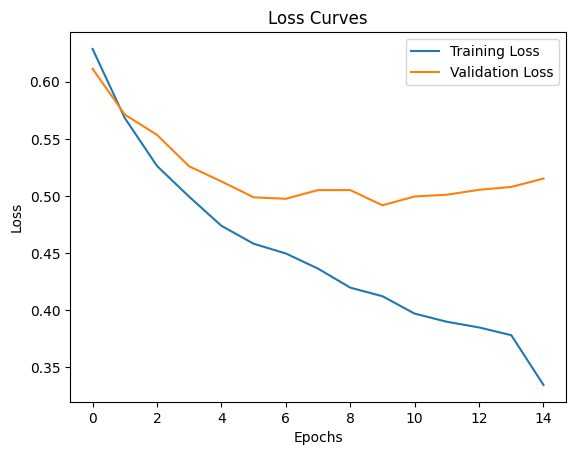

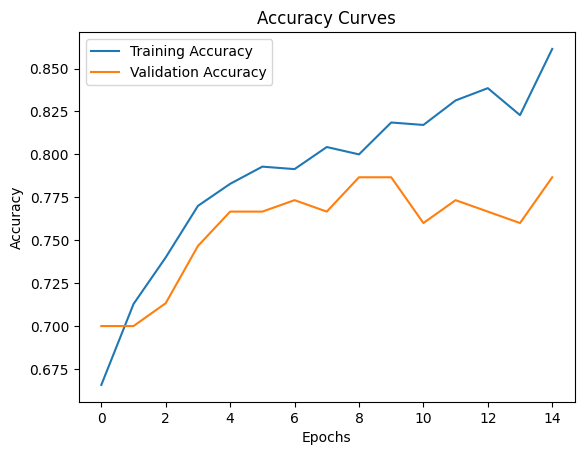

In [32]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Conclusion: After conducting hyperparameter tuning and training the model using the best hyperparameters, the final model achieved an AUC-ROC score of 0.8015, which is the highest among all models tested during this project. This result indicates that the final model was the most effective at distinguishing between the two classes. The test accuracy remained consistent and did not show significant improvement, this could mean that the dataset could possibly have a performance ceiling due to its characteristics. However, an AUC-ROC score of 0.8015 still indicatres a strong discriminatory power.
